# Regressão Logística


Este conjunto de dados contém os seguintes dados:

tempo_diario_site: tempo diário no site em minutos.

idade: idade do consumidor.

renda_media_regiao: Média da renda do consumidor na região.

tempo_medio_internet: Média em minutos por dia que o consumidor está na internet.

titulo: Título do anúncio.

cidade: Cidade do consumidor.

sexo: Se o consumidor era homem (1) ou mulher(0).

pais: País do consumidor.

timestamp_clique: hora em que o consumidor clicou no anúncio ou janela fechada.

clique: 0 ou 1 indicam se clicou ou não no anúncio.

In [7]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dados=pd.read_csv('advertising.csv')

# Análise Exploratória

In [9]:
dados.head()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
#Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_diario_site     1000 non-null   float64
 1   idade                 1000 non-null   int64  
 2   renda_media_regiao    1000 non-null   float64
 3   tempo_medio_internet  1000 non-null   float64
 4   titulo                1000 non-null   object 
 5   cidade                1000 non-null   object 
 6   sexo                  1000 non-null   int64  
 7   pais                  1000 non-null   object 
 8   timestamp_clique      1000 non-null   object 
 9   clique                1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


O conjunto de dados não possui nenhum dado nulo.

In [11]:
dados.describe()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,sexo,clique
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [15]:
dados.shape

(1000, 10)

In [16]:
dados.duplicated().sum()

0

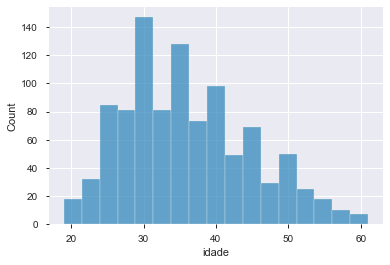

In [22]:
%matplotlib inline
sns.histplot(dados['idade'])
plt.show()

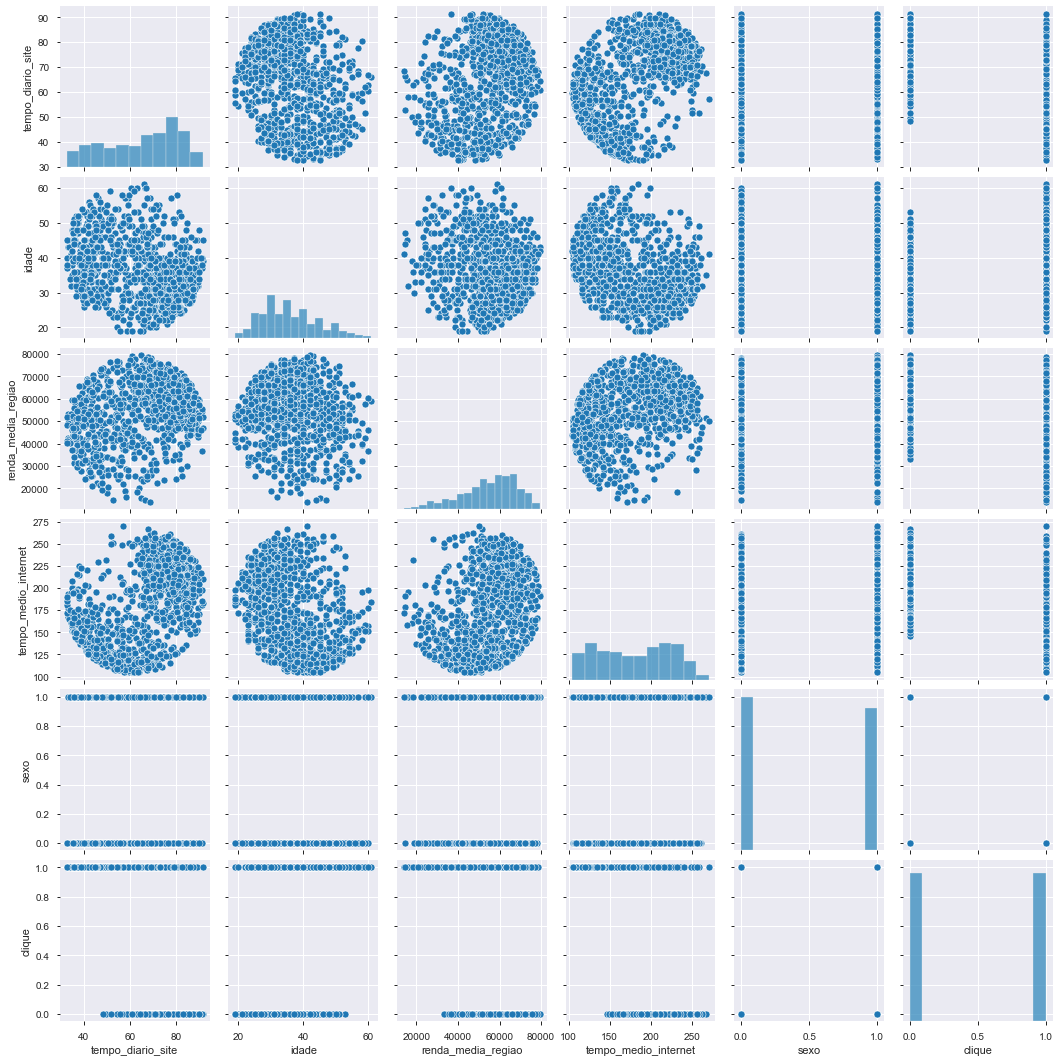

In [24]:
sns.pairplot(dados)
plt.show()

In [25]:
cor_dados=dados.corr()
cor_dados


,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,sexo,clique
tempo_diario_site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
idade,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
renda_media_regiao,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
tempo_medio_internet,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
sexo,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
clique,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000
